In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost joblib


     ------------------------------------ 150.0/150.0 MB 754.1 kB/s eta 0:00:00


In [1]:
# Customer Churn Prediction Project
# Objective: Predict whether a customer will churn (leave the company) based on customer data

# ─── Step 1: Import Libraries ───────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [2]:
# ─── Step 2: Load Dataset ───────────────────────────────────────────
# (Make sure telco_churn.csv is inside data/ folder)
data = pd.read_csv('../data/telco_churn.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# ─── Step 3: Data Cleaning ───────────────────────────────────────────
# Convert 'TotalCharges' to numeric, handle errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop any rows with missing values
data.dropna(inplace=True)

# Encode categorical variables (object type columns)
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Quick check
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int32  
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int32  
 7   MultipleLines     7032 non-null   int32  
 8   InternetService   7032 non-null   int32  
 9   OnlineSecurity    7032 non-null   int32  
 10  OnlineBackup      7032 non-null   int32  
 11  DeviceProtection  7032 non-null   int32  
 12  TechSupport       7032 non-null   int32  
 13  StreamingTV       7032 non-null   int32  
 14  StreamingMovies   7032 non-null   int32  
 15  Contract          7032 non-null   int32  
 16  PaperlessBilling  7032 non-null   int32  


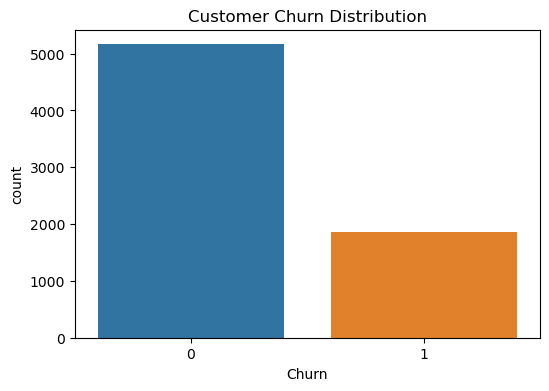

In [4]:
# ─── Step 4: Exploratory Data Analysis (EDA) ─────────────────────────
# Plot churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data)
plt.title('Customer Churn Distribution')
plt.show()


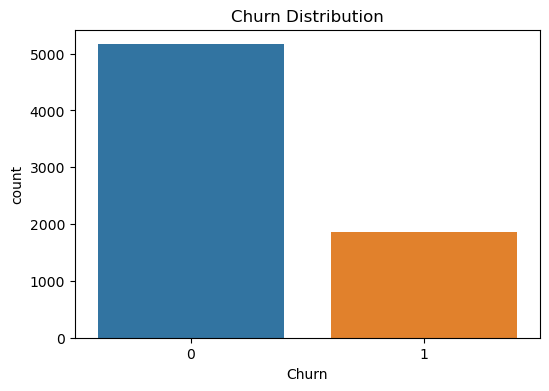

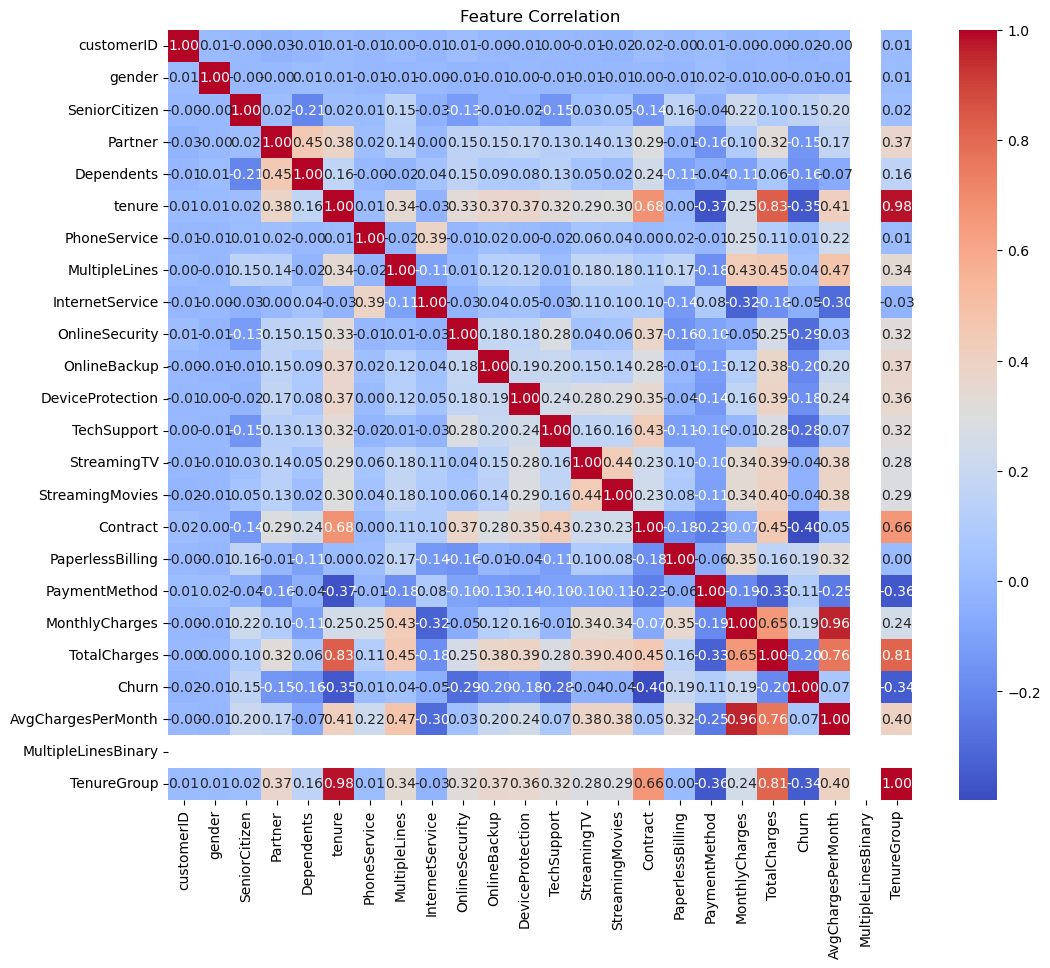

In [25]:
# ─── Cell 4: Exploratory Data Analysis (EDA) ─────────────────────────────────
# 1) Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# 2) Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


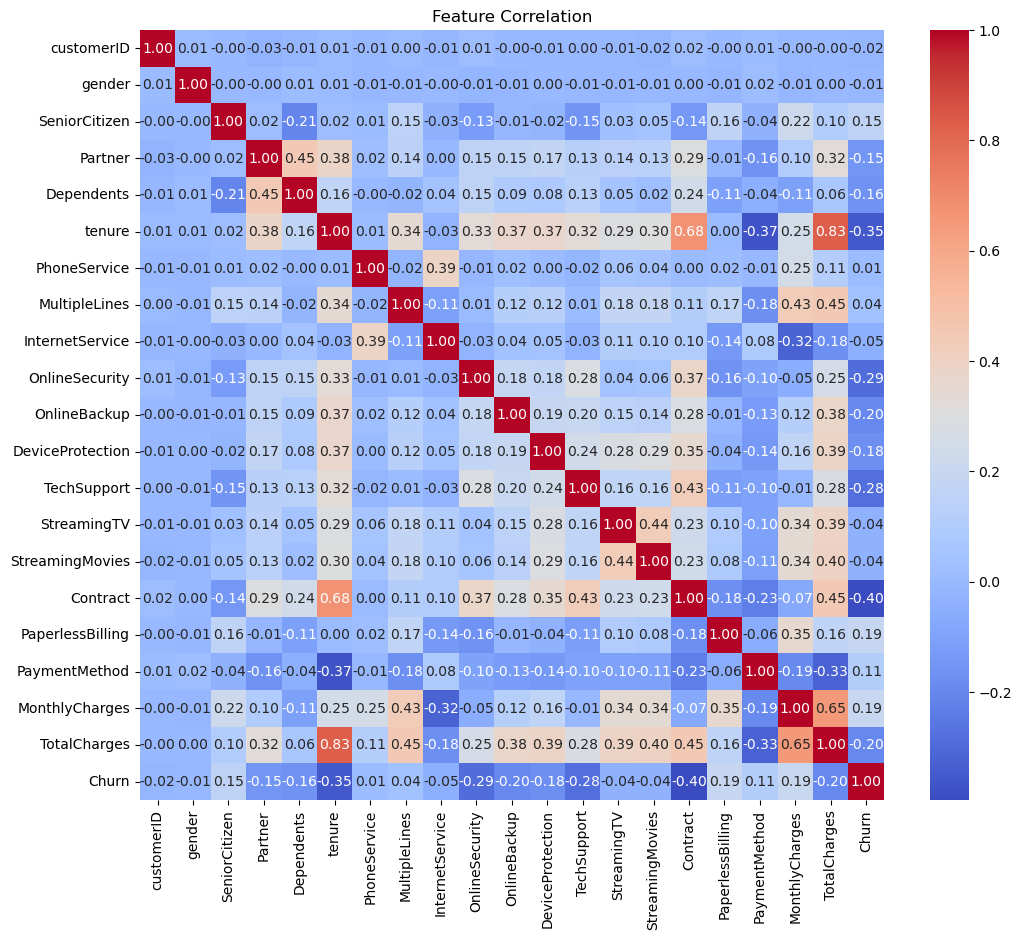

In [5]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [6]:
# ─── Step 5: Feature Selection ──────────────────────────────────────
# Choose only 3 features for this project (based on importance and simplicity)
features = ['MonthlyCharges', 'tenure', 'TotalCharges']

X = data[features]
y = data['Churn']

print("Selected Features:", features)


Selected Features: ['MonthlyCharges', 'tenure', 'TotalCharges']


In [7]:
# ─── Step 6: Train-Test Split ────────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (5625, 3)
X_test shape: (1407, 3)


In [8]:
# ─── Step 7: Model Training ──────────────────────────────────────────
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.7590618336886994

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.56      0.42      0.48       374

    accuracy                           0.76      1407
   macro avg       0.69      0.65      0.66      1407
weighted avg       0.74      0.76      0.75      1407



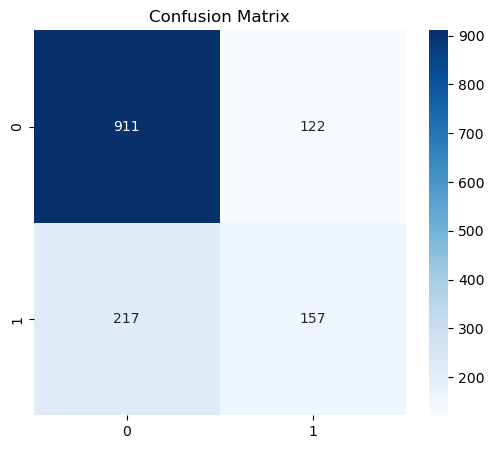

In [9]:
# ─── Step 8: Model Evaluation ────────────────────────────────────────
# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


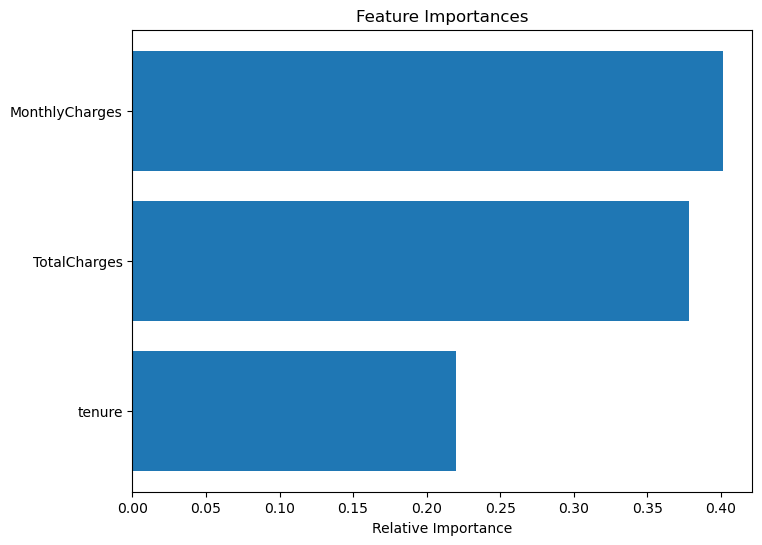

In [10]:
# ─── Step 9: Feature Importance ─────────────────────────────────────
importances = model.feature_importances_
idx = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(idx)), importances[idx], align='center')
plt.yticks(range(len(idx)), [features[i] for i in idx])
plt.xlabel('Relative Importance')
plt.show()


In [11]:
# ─── Step 10: Save the Model ─────────────────────────────────────────
# Save trained model so Flask app can use it
joblib.dump(model, '../models/random_forest_model.pkl')
print("Model saved successfully to '../models/random_forest_model.pkl'")


Model saved successfully to '../models/random_forest_model.pkl'
